In [2]:
import numpy as np
from matplotlib import pyplot as plt

 # Zad 1
 Liczba próbek (w jednym okresie) sygnału rzeczywistego $s(t) = sin(2 \pi t)$ wynosi N, gdzie N jest potęgą 2.

a) Przyjmując N = 8 wykreślić przebieg sygnału spróbkowanego, widmo amplitudowe i fazowe oraz zweryfikować eksperymentalnie słuszność twierdzenia Parsevala.

In [10]:
def s(t):
    return np.sin(2 * np.pi * t)

N = 8

space = np.linspace(0, 1, N, endpoint = False)
signal = s(space)

spectrum = np.fft.fft(signal)
frequencies = np.fft.fftfreq(N)

ampl_spectrum = np.abs(spectrum) / N
phase_spectrum = np.angle(spectrum)


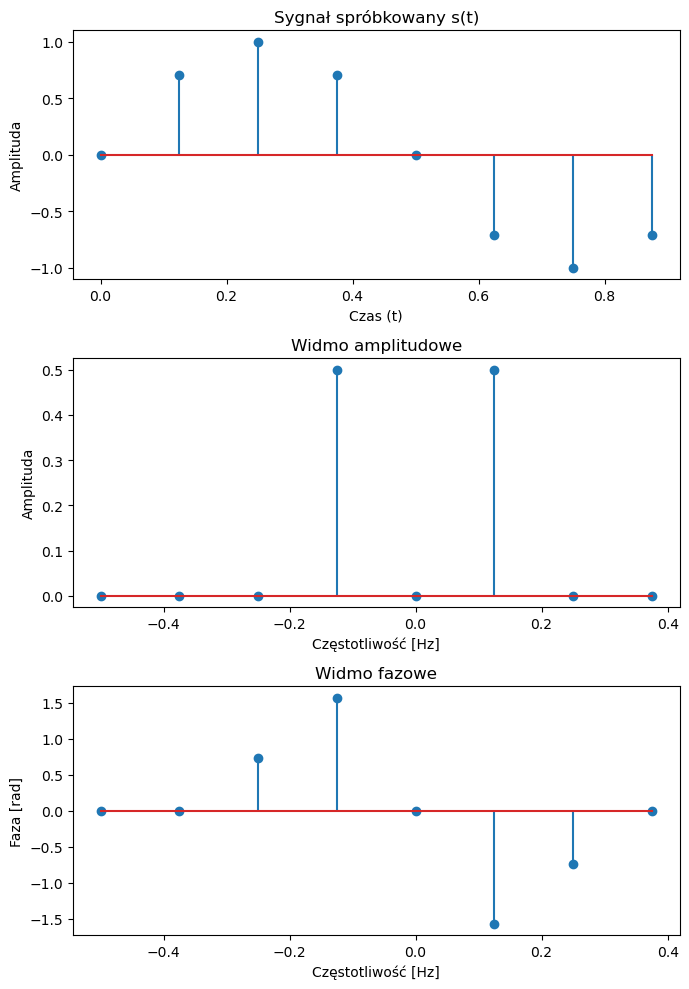

In [11]:
# Plotting

fig, axs = plt.subplots(3, 1, figsize=(7, 10))
axs[0].stem(space, signal)
axs[0].set_title("Sygnał spróbkowany s(t)")
axs[0].set_xlabel("Czas (t)")
axs[0].set_ylabel("Amplituda")

axs[1].stem(frequencies, ampl_spectrum)
axs[1].set_title("Widmo amplitudowe")
axs[1].set_xlabel("Częstotliwość [Hz]")
axs[1].set_ylabel("Amplituda")

axs[2].stem(frequencies, phase_spectrum)
axs[2].set_title("Widmo fazowe")
axs[2].set_xlabel("Częstotliwość [Hz]")
axs[2].set_ylabel("Faza [rad]")

plt.tight_layout()
plt.show()

In [5]:
# Parseval

energy_time = np.sum(signal ** 2)
energy_freq = np.sum(np.abs(spectrum) ** 2) / N


print(f"Energia w dziedzinie czasu: {energy_time:.4f}")
print(f"Energia w dziedzinie częstotliwości: {energy_freq:.4f}")
print(f"Czy energie są równe? {'Tak' if np.isclose(energy_time, energy_freq) else 'Nie'}")


Energia w dziedzinie czasu: 4.0000
Energia w dziedzinie częstotliwości: 4.0000
Czy energie są równe? Tak


1.a) wnioski:

b) Wykreślić wykres przedstawiający czas wyznaczania widma sygnału dyskretnego za pomocą
algorytmu FFT w funkcji liczby próbek

==========

Skomentować kształt
otrzymanego wykresu odnosząc się do teoretycznej złożoności obliczeniowej algorytmu FFT.

# Zad 2
!TODO

# Zadanie 3
Zbadać wpływ dopełnienia zerami na postać widma amplitudowego i widma fazowego dyskretnego
sygnału 𝑠[𝑛] = $𝐴 (1 − \frac{n\mod N}{N})$ o amplitudzie 𝐴 = 4 i okresie podstawowym 𝑁 = 12. W tym celu dla
każdej wartości 𝑁0 ∈ {0,1𝑁, 4𝑁, 9𝑁} wykreślić widmo amplitudowe i fazowe sygnału 𝑠[𝑛]
dopełnionego 𝑁0 zerami. Skomentować otrzymane wyniki

Dodanie 0N zer:


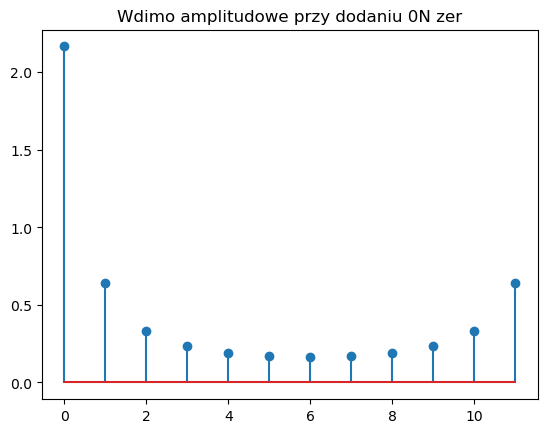

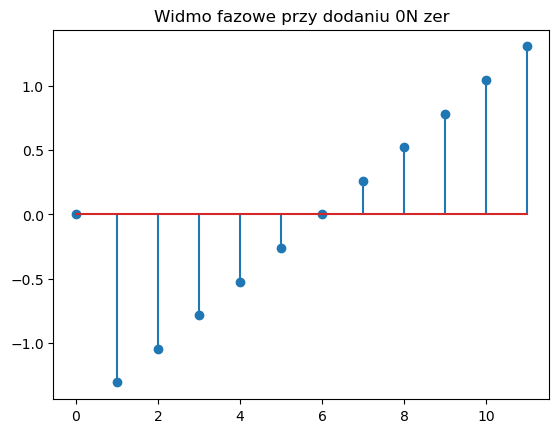

Dodanie 1N zer:


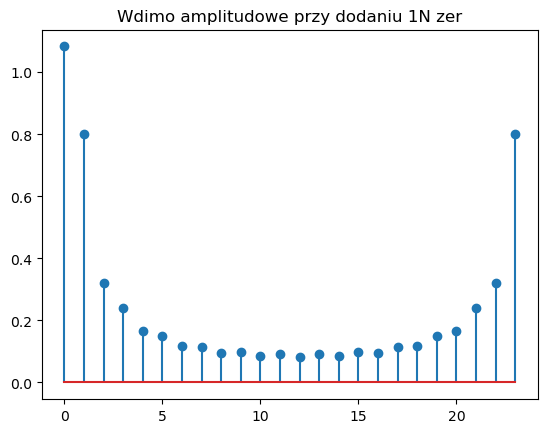

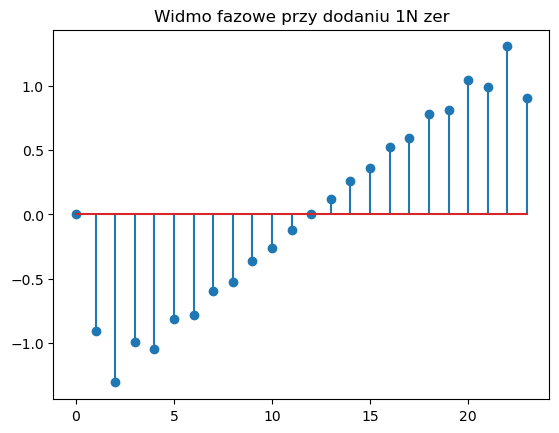

Dodanie 4N zer:


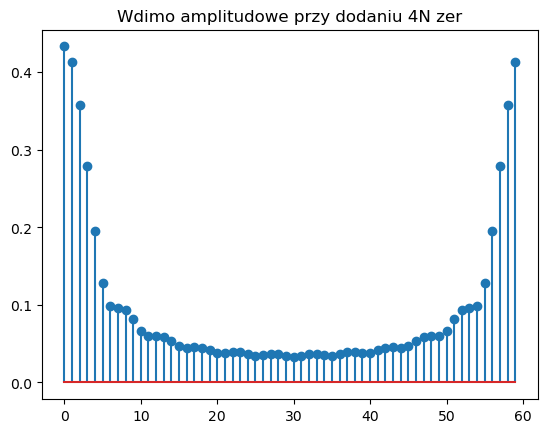

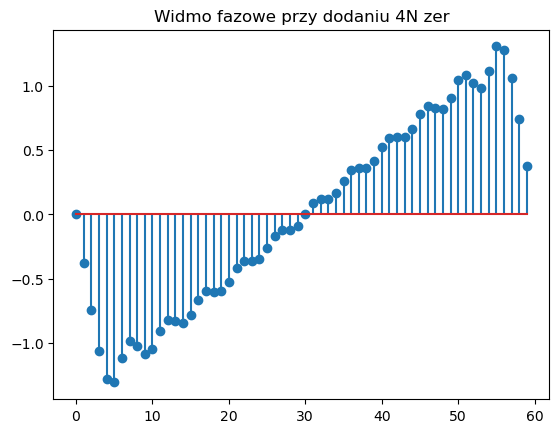

Dodanie 9N zer:


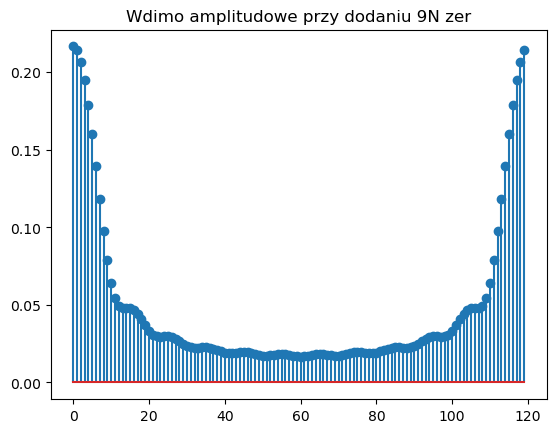

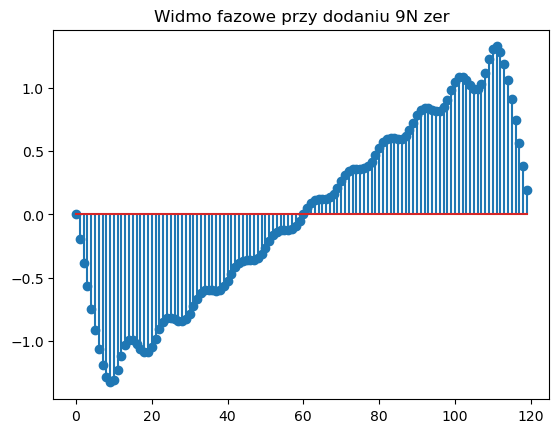

In [8]:
A = 4
N = 12
N0_list = [0, 1, 4, 9]

def s(n):
    return A * (1 - (n % N) / N)

signal = [s(n) for n in range(N)]

for n0_base in N0_list:
    n0 = n0_base * N
    s_with_zeros = signal + [0.0] * n0
    spectrum = np.fft.fft(s_with_zeros)
    ampl_spectrum = np.abs(spectrum) / (N + n0)
    phase_spectrum = np.angle(spectrum)
    
    print(f"Dodanie {n0_base}N zer:")

    plt.stem(ampl_spectrum)
    plt.title(f"Wdimo amplitudowe przy dodaniu {n0_base}N zer")
    plt.show()

    plt.stem(phase_spectrum)
    plt.title(f"Widmo fazowe przy dodaniu {n0_base}N zer")
    plt.show()




## Wnioski
